In [1]:
# install kaggle
!pip install -q kaggle

In [2]:
# upload the generated api token in .json format from local system
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shizacharania","key":"f4d4c61a9252e57ae14d3185e707df48"}'}

In [3]:
# make a kaggle directory in my files
!mkdir ~/.kaggle

In [4]:
# put the kaggle.json file in that directory
!cp kaggle.json ~/.kaggle/

In [5]:
# grant permission for the .json file to act
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
# list available datsets to ensure that the API worked and kaggle's linked
!kaggle datasets list

ref                                                         title                                               size  lastUpdated          downloadCount  
----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
yamqwe/omicron-covid19-variant-daily-cases                  Omicron daily cases by country (COVID-19 variant)  432KB  2022-01-24 07:15:53           8792  
nkitgupta/jigsaw-regression-based-data                      Jigsaw Regression Based Data                         3GB  2022-01-10 06:29:59            514  
prasertk/netflix-subscription-price-in-different-countries  Netflix subscription fee in different countries      3KB  2022-01-15 07:06:09            883  
yasserh/song-popularity-dataset                             Song Popularity Dataset                            805KB  2022-01-07 13:18:43           1169  
vishalmane10/anime-dataset-2022                             Anime Data

In [7]:
# download the mri segmentation datset with its api command
!kaggle datasets download -d mateuszbuda/lgg-mri-segmentation

 99% 706M/714M [00:04<00:00, 175MB/s]
100% 714M/714M [00:04<00:00, 163MB/s]


In [ ]:
# unzip the images from the .zip file so we can directly access these images
!unzip lgg-mri-segmentation.zip

In [9]:
#visualize the amount of masks and non-masks
import matplotlib.pyplot as plt
import numpy as np
import glob
import cv2
import os
import pandas as pd

# path of all the images:
root_path = '/content/lgg-mri-segmentation/kaggle_3m/'

potential_mask_files = glob.glob(root_path + "*/*_mask*") # names of all the files with masks

mask_files = []
add_count = 0
for mask in potential_mask_files: # only took the files that have tumours in them to decrease the dataset since RAM keeps running out
  if np.max(cv2.imread(mask)) > 0:
    mask_files.append(mask)
  elif np.max(cv2.imread(mask)) == 0 and add_count % 3 == 0:
    mask_files.append(mask)
  
  add_count += 1

image_files = []
for mask in mask_files:
  rmask = mask.replace("_mask", "")
  image_files.append(rmask)

print(mask_files) # 3929 items - e.x.: /content/lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_20040224/TCGA_FG_A60K_20040224_23_mask.tif
print(image_files) # 3929 items - e.x.: /content/lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_20040224/TCGA_FG_A60K_20040224_23.tif

tumour_count = []

def diagnosis(mask_path):
    if np.max(cv2.imread(mask_path)) > 0: # return np.max(cv2.imread(mask_path)) - returns 255 if there is a tumour, otherwise returns 0
      tumour_count.append("1")
      return 1
    else:
      tumour_count.append("0")
      return 0

files_df = pd.DataFrame({"image_path": image_files, 
                         "mask_path": mask_files,
                         "diagnosis": [diagnosis(x) for x in mask_files]})

print(files_df)

['/content/lgg-mri-segmentation/kaggle_3m/TCGA_HT_7602_19951103/TCGA_HT_7602_19951103_8_mask.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_HT_7602_19951103/TCGA_HT_7602_19951103_2_mask.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_HT_7602_19951103/TCGA_HT_7602_19951103_17_mask.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_HT_7602_19951103/TCGA_HT_7602_19951103_7_mask.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_HT_7602_19951103/TCGA_HT_7602_19951103_14_mask.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_HT_7602_19951103/TCGA_HT_7602_19951103_20_mask.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_HT_7602_19951103/TCGA_HT_7602_19951103_11_mask.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_HT_7602_19951103/TCGA_HT_7602_19951103_6_mask.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_HT_7602_19951103/TCGA_HT_7602_19951103_9_mask.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_HT_7602_19951103/TCGA_HT_7602_19951103_12_mask.tif', '/content/lgg-

Tumours: 1373 ........... Non-Tumours: 863


<BarContainer object of 2 artists>

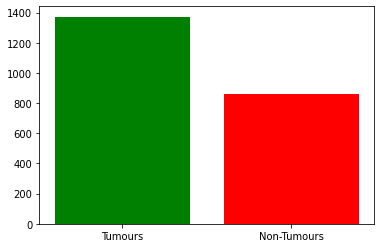

In [10]:
# to visualize the amount of tumours and non-tumours in the dataset
n_tumours = tumour_count.count("1")
n_nontumours = tumour_count.count("0")

print("Tumours: " + str(n_tumours), "...........", "Non-Tumours: " + str(n_nontumours))

plt.bar(["Tumours", "Non-Tumours"], [n_tumours, n_nontumours], color=["green", "red"])

In [11]:
# importing libraries
import torch
import torchvision
from torchvision import datasets
from torchvision.transforms import transforms

In [12]:
# finding mean and standard deviation for the dataset
num_pixels = len(image_files)*256*256 #total number of pixels in our dataset

total_sum = 0
for data in image_files:
  image = cv2.imread(data)
  image = torch.from_numpy(image)
  total_sum += image[0].sum() #sum of the current batch of images
  mean = total_sum/num_pixels


# std calculated with formula
sum_squared_error = 0
for data in image_files:
  image = cv2.imread(data)
  image = torch.from_numpy(image)
  sum_squared_error += ((image[0] - mean)**2).sum() #adding up the difference between all the elements in the batch and the mean
  std = torch.sqrt(sum_squared_error/num_pixels) # only one element tensors can be converted to Python scalars, so use torch.sqrt instead of math.sqrt

print("Mean:", mean)
print("Standard Deviation:", std)

Mean: tensor(0.0230)
Standard Deviation: tensor(1.2175)


In [13]:
image_data = []
mask_data = []

# files are file paths, dataset is empty list that you will append the images too
def loading_data(files, dataset, actions):
  for data in files:
    # reading the image/mask
    image = cv2.imread(data) #makes it a numpy array
            
    # resizing the image/mask
    image = cv2.resize(image, (96, 96))
    # before, I flattened it and it changed a lot because, after the transformations, the tensor changes its composition when rotating or flipping
    # so when setting it to 256x256 again after, there's a weird result

    # convert the PIL image into a PyTorch tensor, cast the int8 values to float32, normalize
    if actions == True: #masks
      transform = torchvision.transforms.Compose([transforms.ToTensor(),
                                                  transforms.ConvertImageDtype(torch.float),
                                                  transforms.Normalize((0.0215, 0.0215, 0.0215), (1.1606, 1.1606, 1.1606))])
      image = transform(image)

    elif actions == False: #masks
      transform = torchvision.transforms.Compose([transforms.ToTensor(), transforms.ConvertImageDtype(torch.float), transforms.Grayscale()])
      image = transform(image)

    # no blurs needed because the edges need to be clear and precise
    
    dataset.append(image)

In [14]:
# the normalize function usually goes after data augmentation, but since only the positions of the pixels are changing (when flipping/rotating), it's not a problem

def data_augmentation(dataset): # adding modifications of original images to the dataset
  count = 0
  v_flips = 0
  h_flips = 0
  for image in dataset:
    # since the image is in a tensor, you can use torchvision's transforms
    # list of data augmentation commands
    if count % 9 == 0:
      # 90 degree clockwise rotation
      transform0 = transforms.RandomRotation(degrees=[90,90])
      image = transform0(image)
      dataset.append(image)
    
    if count % 9 == 1:
      # vertical flip
      transform1 = transforms.RandomVerticalFlip(p=1)
      image = transform1(image)
      v_flips += 1
      dataset.append(image)

    elif count % 9 == 2:
      # horizontal flip 
      transform2 = transforms.RandomHorizontalFlip(p=1)
      image = transform2(image)
      h_flips += 1
      dataset.append(image)
      
    else:
      pass

    count += 1

In [15]:
loading_data(image_files, image_data, True)

In [16]:
loading_data(mask_files, mask_data, False)

In [17]:
# when you run it again and again, change in #s for training data because it adds on

print(len(image_data), len(mask_data))

# split dataset into training and validation - testing stays same
len_dataset = int(np.floor(len(image_data) * 0.75))

trimage_data = image_data[:len_dataset]
trmask_data = mask_data[:len_dataset]
vimage_data = image_data[len_dataset:]
vmask_data = mask_data[len_dataset:]
testimage_data = image_data
testmask_data = mask_data

print(str(len(trimage_data)), "----", str(len(vimage_data)))

2236 2236
1677 ---- 559


In [18]:
import random
from random import shuffle

print(len(trimage_data))
print(len(trmask_data))

# data augmentation
data_augmentation(trimage_data)
data_augmentation(trmask_data)

# print statements to ensure that data augmentation worked
print(len(trimage_data))
print(len(trmask_data))

1677
1677
2517
2517


In [19]:
all_training_data = list(zip(trimage_data, trmask_data)) # zip the lists and then make that a list so you can shuffle them
random.shuffle(all_training_data)
trimage_data, trmask_data = zip(*all_training_data) # unzip

# validation data shuffle
all_validation_data = list(zip(vimage_data, vmask_data))
random.shuffle(all_validation_data)
vimage_data, vmask_data = zip(*all_validation_data)

# testing data - no need to shuffle

In [20]:
from torchvision import utils

# instead of making a classs to retrieve the data, you can zip the images and the masks, make that a tuple, and use that data for the dataloader
training_data = list(zip(trimage_data, trmask_data))
validation_data = list(zip(vimage_data, vmask_data))
testing_data = list(zip(testimage_data, testmask_data))

trainloader = torch.utils.data.DataLoader(training_data, batch_size=64, shuffle=True)
validationloader = torch.utils.data.DataLoader(validation_data, batch_size=64, shuffle=True)
testingloader = torch.utils.data.DataLoader(testing_data, batch_size=64, shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


TEST:
torch.Size([64, 96, 96, 3])
torch.Size([64, 96, 96])
Images:


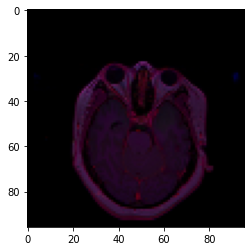

Masks:


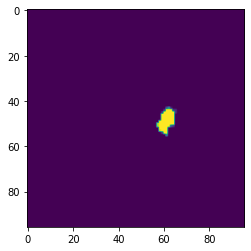

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




TRAIN:
torch.Size([64, 96, 96, 3])
torch.Size([64, 96, 96])
Images:


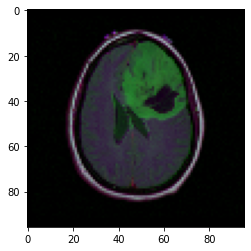

Masks:


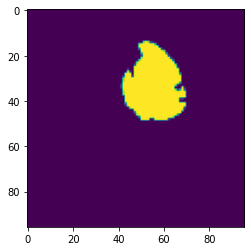

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




TEST:
torch.Size([64, 96, 96, 3])
torch.Size([64, 96, 96])
Images:


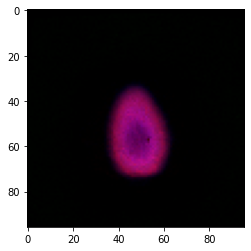

Masks:


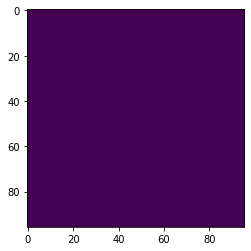

In [21]:
# function to un-normalize and display an image.

# testing data
trimages, trmasks = next(iter(trainloader))

trimages = trimages.permute((0,2,3,1))
trmasks = trmasks.permute((0,2,3,1))
trmasks = trmasks.squeeze()

print("TEST:")
print(trimages.shape)
print(trmasks.shape) # greyscaled

print("Images:")
plt.imshow(trimages[3])
plt.show()
print("Masks:")
plt.imshow(trmasks[3])
plt.show()

print("\n")

# validation data
vimages, vmasks = next(iter(validationloader))

vimages = vimages.permute((0,2,3,1))
vmasks = vmasks.permute((0,2,3,1))
vmasks = vmasks.squeeze()

print("TRAIN:")
print(vimages.shape)
print(vmasks.shape) # greyscaled

print("Images:")
plt.imshow(vimages[1])
plt.show()
print("Masks:")
plt.imshow(vmasks[1])
plt.show()

print("\n")

# testing data
testimages, testmasks = next(iter(testingloader))

testimages = testimages.permute((0,2,3,1))
testmasks = testmasks.permute((0,2,3,1))
testmasks = testmasks.squeeze()

print("TEST:")
print(testimages.shape)
print(testmasks.shape) # greyscaled

print("Images:")
plt.imshow(testimages[0])
plt.show()
print("Masks:")
plt.imshow(testmasks[0])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

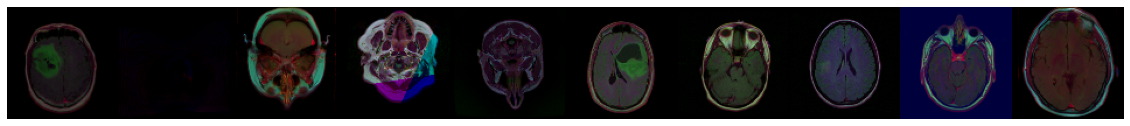

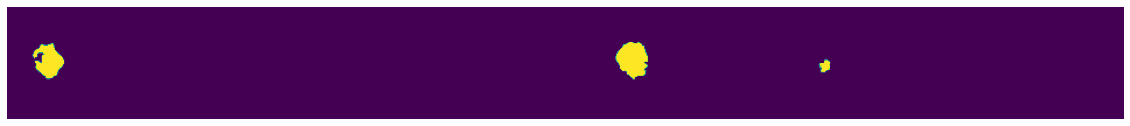

In [22]:
# visualize the images
def show_aug(loader, nrows=4, ncols=10):
    
    images, masks = next(iter(loader))
    images = images.permute((0,2,3,1))
    masks = masks.permute((0,2,3,1))
    masks = masks.squeeze()

    plt.figure(figsize=(20, 20))
    for i in range(len(images[:10])):
      plt.subplot(nrows, ncols, i+1)
      plt.imshow(images[i])
      plt.axis('off')
      plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

    plt.figure(figsize=(20, 20))
    for j in range(len(masks[:10])):
      plt.subplot(nrows, ncols, j+1)
      plt.imshow(masks[j])
      plt.axis('off')
      plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

show_aug(trainloader)

In [23]:
# build the u-net model
import torch.nn as nn
import torchvision.transforms.functional as tf

# first I tried nn.Seqeuential, but that didn't work about because when it came to the skip connections (concatentations)
# I couldn't access the certain elements in the Ordered Dict because they werent variables

# then, I tried using one function and then having one variable for each conv, batchnorm, relu, pooling, transconv, etc
# that didn't work either because the concatentating couldn't take place until the image was actually passed though
# otherwise it would say that you can't concat nn.Conv2D and ____

# then I implemented it into the class function

In [24]:
# since for the image size stays the same until the max pooling layer, the stride in the conv layers are 1 (no downsamplinng in conv layers - modification of unet model)
# https://towardsdatascience.com/batch-norm-explained-visually-why-does-it-work-90b98bcc58a0
# batch norm cancel out bias, so no need for it, but even if you have it in the conv layer parameters, it's no different
# BN is a technique to standardize the inputs to a network, applied to ether the activations of a prior layer or inputs directly
# allows the model to converge faster and speed up training; it makes the training less sensitive to how the weights are initialized and to the precise tuning of hyperparameters
# lets you use higher learning rates since the loss landscape is smoother
# 2 consecutive conv layers (even though they're the same) can reduce noise in the image and be higher level

# super(StackEncoder, self).__init__() <-- for inheritance

class ConvBlock(nn.Module): #one individual one for bottleneck
  def __init__(self, in_channels, out_channels): # no need to input k_size, stride, or padding since that's always constant
    super(ConvBlock, self).__init__()
    self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=(3,3), stride=1, padding=1)
    self.batchnorm = nn.BatchNorm2d(out_channels)
    self.relu = nn.ReLU()
  def forward(self, x):
    x = self.conv(x)
    x = self.batchnorm(x)
    x = self.relu(x)
    return x

class StackEncoder(nn.Module):
  def __init__(self, in_channels, out_channels): # no need to input k_size, stride, or padding since that's always constant
    super(StackEncoder, self).__init__()
    self.max_pool = nn.MaxPool2d(kernel_size=(2,2), stride=2)
    self.block = nn.Sequential(
        ConvBlock(in_channels, out_channels),
        ConvBlock(out_channels, out_channels))
  def forward(self, x):
    block_out = self.block(x)
    pool_out = self.max_pool(block_out)
    return block_out, pool_out # we have this, so when it concatenates, it does concatenation before pooling
    
class StackDecoder(nn.Module):
  def __init__(self, in_channels, out_channels): # no need to input k_size, stride, or padding since that's always constant
    super(StackDecoder, self).__init__()
    self.block = nn.Sequential(
        ConvBlock(in_channels+in_channels, out_channels),
        ConvBlock(out_channels, out_channels))
    
  def forward(self, x, concat_tensor): #down tensor is to concatenate
    batch, channels, height, width = concat_tensor.shape
    x = torch.nn.functional.interpolate(x, size=(height, width)) # i used this instead of trans_cov because i needed to crop the size before passing it on & trans conv couldn't do that
    x = torch.cat([x, concat_tensor], 1)
    blockout = self.block(x)
    return blockout

class UNET(nn.Module):
  def __init__(self, input_shape):
    super(UNET, self).__init__()

    self.batch, self.channel, self.height, self.width = input_shape

    # 96 x 96 x 3
    self.down1 = StackEncoder(self.channel, 64)
    # 48 x 48 x 64
    self.down2 = StackEncoder(64, 128)
    # 24 x 24 x 128
    self.down3 = StackEncoder(128, 256)
    # 12 x 12 x 256
    self.bottleneck = ConvBlock(256, 256)
    # 12 x 12 x 256
    self.up3 = StackDecoder(256, 128)
    # 24 x 24 x 128
    self.up2 = StackDecoder(128, 64)
    # 48 x 48 x 64
    self.up1 = StackDecoder(64, 1)
    # 96 x 96 x 1


  def forward(self, x):
    down1, out = self.down1(x)
    down2, out = self.down2(out)
    down3, out = self.down3(out)

    bottleneck = self.bottleneck(out)

    up3 = self.up3(x=bottleneck, concat_tensor=down3)
    up2 = self.up2(x=up3, concat_tensor=down2)
    up1 = self.up1(x=up2, concat_tensor=down1)
    
    return up1

In [25]:
# works
inp = torch.rand(1,3,96,96) #batch size = 1 + image = 3 x 128 x 128
print(inp.shape)

model = UNET(inp.shape)
# print(model)

out = model(inp)
print(out.shape)

torch.Size([1, 3, 96, 96])
torch.Size([1, 1, 96, 96])


In [26]:
from torch import optim
import numpy as np
import datetime

optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = torch.nn.CrossEntropyLoss()

In [35]:
# before it was saying that the batch size was showing as 3 for the mask because you can't eliminate 3 since it was the # of channels.
# even if i permuted it or unsqueezed it there were errors about "you didn't permute all dimenstions" and "it should be a 3D tensor", respectively

# ..............

# then, when the error is RuntimeError: Expected object of scalar type Float but got scalar type Double,
# you would need to use the .float() function since it says Expected object of scalar type Float.
# Therefore, the solution is changing y_pred = model(X_trainTensor) to y_pred = model(X_trainTensor.float()).
# Likewise, when you get another error for loss = loss_fn(y_pred, y_trainTensor), you need y_trainTensor.long()
# since the error message says Expected object of scalar type Long

# i.e. the data type for the tensor must be wrong, so it's having a difficult time going through a forward pass anf backpropagation
# ^this error in a loop was showing me: Expected object of scalar type Long but got scalar type Byte, expected scalar type Long but found Float, 
# and expected Byte but found Float. I worked on this for 10 hours x0. It turns out that the root of the problem as that it had to be a float

# But, I had to look for different way to do it - .float() wasn't working because after, when unsqueezing and passing through the model, 
# argument 'input' (position 1) must be Tensor, not builtin_function_or_method

# ans:
# images are uint8 (byte) while the neural network needs inputs as floating point in order to calculate gradients 
# (you can't calculate gradients for backprop using integers as those are not continuous and non-differentiable).
# You can use torchvision.transforms.functional.to_tensor to convert the image into float and into [0, 1] 
# ^ you make the pixel size from [0,1] to avoid longer training since it's less computations with [0,1]

# side error: I had to change my image time a few times from a numpy array to a torch tensor + back and forth
# I also though that you would need to permute (reorder dimensions), but the dimensions were fine the way they were after solving the errors

# ..... 2 days later .....

# I added batch size and got a lot more errors. To sum it up:
# permute image in right order
# you need to have your image as a float in order to calculate gradients(you can't calculate gradients for backprop using integers as those are not
# continuous and non-differentiable) - only 0s and 1s. You also need to divide by 255 after(if we did /255 first, it would be in integers, so non-diffrentiable anyways)
# you also do /255 so it doesnt show that "target 255 out of range" and it's less computations
# same thing for mask because, after input is through the model, the mask needs to compare with the output, which will also be in float - same for /255

# then, you squeeze the output to match the mask, you need to make sure that there's no 1 in [1, 10, 256, 256] because the mask size is [10, 256, 256]

# The batch size is a number of samples processed before the model is updated.
# example: Assume you have a dataset with 200 samples (rows of data) and you choose a batch size of 5 and 1,000 epochs
# This means that the dataset will be divided into 40 batches, each with five samples. The model weights will be updated after each batch of five samples
# This also means that one epoch will involve 40 batches or 40 updates to the model.
# With 1,000 epochs, the model will be exposed to or pass through the whole dataset 1,000 times. 
# That is a total of 40,000 batches during the entire training process.
# i.e. the "for images, masks..." would run 40 times for each batch

trlosses = []
vlosses = []

epochs = 11

for epoch in range(epochs):
  startepoch = datetime.datetime.now()
  #training
  training_loss = 0
  validation_loss = 0
  model.train()
  count = 1
  for images, masks in trainloader:
    images, masks = next(iter(trainloader))
    # images = images.permute((0,1,3,2))
    # images = images.permute((0,2,3,1)) 
    # masks = masks.permute((0,2,3,1))
    # print(images.shape)
    # print(masks.shape)
    masks = masks.squeeze()

    # images = images.float() # needs inputs as floating point in order to calculate gradients 
    # # (you can't calculate gradients for backprop using integers as those are not continuous and non-differentiable) - only 0s and 1s
    # images = images/255 #then we divided by 255 to get an accuracte answer. if we did /255 first, it would be in integers, so non-diffrentiable anyways
    # masks = masks.float() #should be .float() so it can compare with the output, which will also be in float
    # masks = masks/255 

    optimizer.zero_grad() # zero out the gradients to ensure that we clear all the gradients before starting again
    # ^ zero_grad() restarts looping without losses from the last step if you use the optimizer for gradient changes
    # If you do not use zero_grad() the loss will increase not decrease as required.
    output = model(images)
    output = output.squeeze(1) # to match the mask, you need to make sure that there's no 1 in [1, 10, 256, 256] because the mask size is [10, 256, 256]
    # the parameter has to be 1 because, according the documentation, it won't squeeze otherwise
    loss = criterion(output, masks)
    # print(loss)
    loss.backward()
    optimizer.step()

    training_loss += loss.item()

    # print("done one batch", str(count))
    # count += 1

  # validation
  model.eval()
  # print("\n validation time")

  count = 1
  for images, masks in validationloader:
    images, masks = next(iter(validationloader))
    # print(images.shape)
    # print(masks.shape)
    # images = images.permute((0,1,3,2))
    # masks = masks.permute((0,2,3,1))
    masks = masks.squeeze()

    # images = images.permute((0,3,1,2))
    # images = images.float()
    # images = images/255
    # masks = masks.float()
    # masks = masks/255
    
    out = model(images)
    out = out.squeeze(1)
    loss = criterion(out, masks)

    validation_loss += loss.item()
    
    # print("done one batch", str(count))
    # count += 1
  
  mean_tloss = training_loss/(len(training_data))
  mean_vloss = validation_loss/len(validation_data)

  trlosses.append(mean_tloss)
  vlosses.append(mean_vloss)

  print("Epoch: {}  ...".format(epoch+1), "Training Loss: {:.4f}  ...".format(trlosses[-1]), "Validation Loss: {:.4f} ...".format(vlosses[-1]))

  if vlosses[-1] <= min(vlosses):
    print("Validation Loss has decreased - saving")
    torch.save(model.state_dict(), "brainmrisegmentation.pth")
  
  endepoch = datetime.datetime.now()

  print("Epoch time:", str(endepoch-startepoch), "\n")

# https://towardsdatascience.com/understanding-dimensions-in-pytorch-6edf9972d3be <- for dim = 0 and dim = 1

Epoch: 1  ... Training Loss: 0.0825  ... Validation Loss: 0.1266 ...
Validation Loss has decreased - saving
Epoch time: 0:05:37.276057 

Epoch: 2  ... Training Loss: 0.0802  ... Validation Loss: 0.1086 ...
Validation Loss has decreased - saving
Epoch time: 0:05:36.662924 

Epoch: 3  ... Training Loss: 0.0797  ... Validation Loss: 0.0992 ...
Validation Loss has decreased - saving
Epoch time: 0:05:36.932956 

Epoch: 4  ... Training Loss: 0.0802  ... Validation Loss: 0.1173 ...
Epoch time: 0:05:37.147781 

Epoch: 5  ... Training Loss: 0.0760  ... Validation Loss: 0.1107 ...
Epoch time: 0:05:37.161588 

Epoch: 6  ... Training Loss: 0.0793  ... Validation Loss: 0.1089 ...
Epoch time: 0:05:37.556545 

Epoch: 7  ... Training Loss: 0.0786  ... Validation Loss: 0.1069 ...
Epoch time: 0:05:39.228506 

Epoch: 8  ... Training Loss: 0.0837  ... Validation Loss: 0.1062 ...
Epoch time: 0:05:37.094207 

Epoch: 9  ... Training Loss: 0.0778  ... Validation Loss: 0.1223 ...
Epoch time: 0:05:36.370812 

E

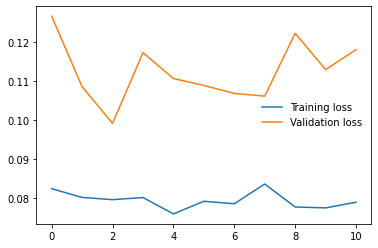

In [36]:
# visualize losses

plt.plot(trlosses, label="Training loss")
plt.plot(vlosses, label="Validation loss")
plt.legend(frameon=False)

# validation loss was fluctuating a lot, so I lowered my learning rate + make # of images in validation a bit higher

In [37]:
# load saved model and its parameters
loaded_model = torch.load("brainmrisegmentation.pth")
model.load_state_dict(loaded_model)

<All keys matched successfully>

In [38]:
# testing
epochs = 1
testing_loss = 0
correct_pixels = 0
total_pixels = 0

for images, masks in testingloader:
  images, masks = next(iter(testingloader))
  masks = masks.squeeze()
  out = model(images)
  out = out.squeeze(1)
  loss = criterion(out, masks)
  testing_loss += loss.item()

  preds = (out > 0.5).float()
  correct_pixels += (preds == masks).sum()
  # print(torch.numel(preds), len(preds)) # 589824 64
  total_pixels += torch.numel(preds) # number of elements (pixels) in each predicitions (96x96x64 = 589824)

accuracy = correct_pixels / total_pixels
print("Got {}/".format(correct_pixels) + "{}".format(total_pixels) + " correct with an accuracy of {:.2f}%".format(accuracy*100))

Got 18685916/20643840 correct with an accuracy of 90.52%
